In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data=pd.read_csv('http://archive.ics.uci.edu/ml/datasets/Forest+Fires') 
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [6]:
# 1. X and Y - x-axis and y-axis0 spatial coordinate within the Montesinho park map: 1 to 9
# FFMC - FFMC index from the FWI system: 18.7 to 96.20
# DMC - DMC index from the FWI system: 1.1 to 291.3
# DC - DC index from the FWI system: 7.9 to 860.6
# ISI - ISI index from the FWI system: 0.0 to 56.10
# temp - temperature in Celsius degrees: 2.2 to 33.30
# RH - relative humidity in %: 15.0 to 100
# wind - wind speed in km/h: 0.40 to 9.40
# rain - outside rain in mm/m2 : 0.0 to 6.4
# area - the burned area of the forest (in ha): 0.00 to 1090.84

In [7]:
new_data=data.drop(['FFMC','DMC','DC'], axis=1)
new_data

,X,Y,month,day,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,11.3,25.6,42,4.0,0.0,0.00


In [8]:
new_data.info

<bound method DataFrame.info of      X  Y month  day   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 10 columns]>

In [13]:
count=new_data["temp"].count()
mean=sum(new_data.temp)/count
print("mean {}".format(mean))

mean 18.88916827852998


In [23]:
n_fire = new_data.shape[0] 

temp_below18=new_data.loc[(new_data['temp']<=18)]
n_below18 = temp_below18.shape[0]
print("temparature rating 18 and below: {}".format(n_below18))
print("lowest temperature")

temparature rating 18 and below: 212
lowest temperature


In [25]:
n_fire = new_data.shape[0] #temp sinir belirleme

temp_18_25=new_data.loc[(new_data['temp']>=18) & (new_data['temp']<=25 )]
n_18_25= temp_18_25.shape[0]
print("temparature rating 18 and  25: {}".format(n_18_25))
print("warm temperature")

temparature rating 18 and  25: 244
warm temperature


In [26]:
n_fire = new_data.shape[0] #temp sinir belirleme

temp_above25=new_data.loc[(new_data['temp']>=25)]
n_above25 = temp_above25.shape[0]
print("temparature rating 25 and above: {}".format(n_above25))
print("highest temperature")

temparature rating 25 and above: 66
highest temperature


In [27]:
np.round(new_data.describe())

,X,Y,ISI,temp,RH,wind,rain,area
count,517.0,517.0,517.0,517.0,517.0,517.0,517.0,517.0
mean,5.0,4.0,9.0,19.0,44.0,4.0,0.0,13.0
std,2.0,1.0,5.0,6.0,16.0,2.0,0.0,64.0
min,1.0,2.0,0.0,2.0,15.0,0.0,0.0,0.0
25%,3.0,4.0,6.0,16.0,33.0,3.0,0.0,0.0
50%,4.0,4.0,8.0,19.0,42.0,4.0,0.0,1.0
75%,7.0,5.0,11.0,23.0,53.0,5.0,0.0,7.0
max,9.0,9.0,56.0,33.0,100.0,9.0,6.0,1091.0


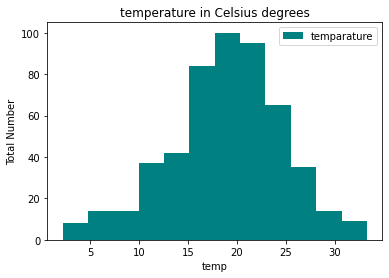

In [28]:
plt.hist(new_data.temp,bins=12,
         color='#008080',label="temparature") 

plt.xlabel("temp")
plt.ylabel("Total Number")
plt.legend()
plt.title("temperature in Celsius degrees")

plt.show()

,X,Y,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
ISI,0.006210,-0.024488,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.063385,0.044873,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


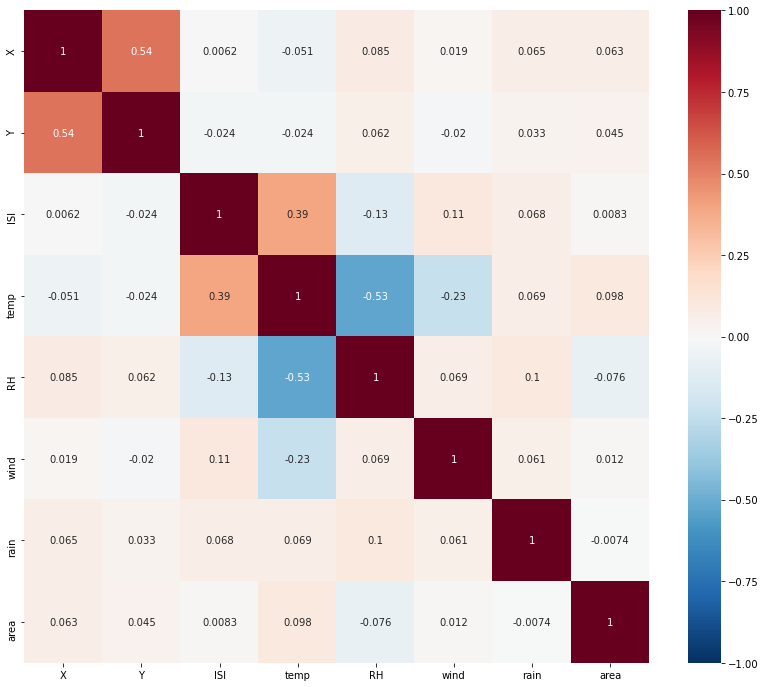

In [13]:
correlation = new_data.corr()
display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

C:\Users\Aylin Yilmaz\anaconda3\lib\site-packages\seaborn\axisgrid.py:1665: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


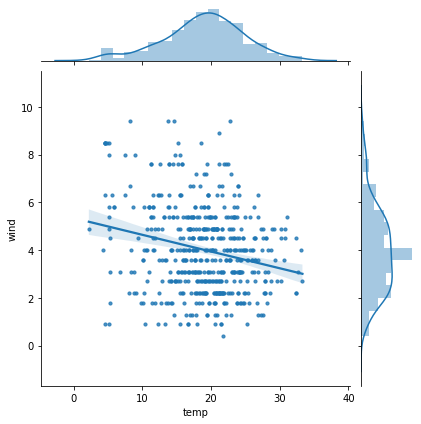

In [13]:
#Visualize the co-relation between
#Create a new dataframe containing only selected  columns to visualize their co-relations
wind_temp = new_data[['wind', 'temp']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="temp", y="wind", data=new_data, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)


#this correlation is negative. when temp is increasing, wind is decreasing. r=-0.23

C:\Users\Aylin Yilmaz\anaconda3\lib\site-packages\seaborn\axisgrid.py:1665: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Aylin Yilmaz\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


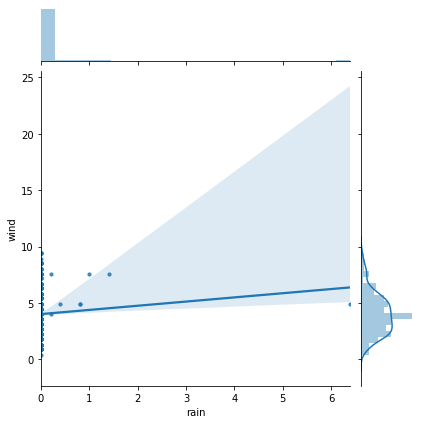

In [29]:
wind_rain = new_data[['wind', 'rain']]
gridA = sns.JointGrid(x="rain", y="wind", data=new_data, size=6)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot)

#this correlation is positive.wind variable increases while the other increases. r= 0.0061